In [21]:
!pip install neuralprophet[live]

ERROR: Cannot install neuralprophet[live]==0.2.5, neuralprophet[live]==0.2.6, neuralprophet[live]==0.2.7, neuralprophet[live]==0.2.8 and neuralprophet[live]==0.3.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts



  Using cached neuralprophet-0.3.0-py3-none-any.whl (67 kB)
  Using cached torch_lr_finder-0.2.1-py3-none-any.whl (11 kB)
  Using cached holidays-0.12-py3-none-any.whl (165 kB)
  Using cached neuralprophet-0.2.8-py3-none-any.whl (55 kB)
  Using cached neuralprophet-0.2.7-py3-none-any.whl (56 kB)
  Using cached neuralprophet-0.2.6-py3-none-any.whl (55 kB)
  Using cached neuralprophet-0.2.5-py3-none-any.whl (54 kB)

The conflict is caused by:
    neuralprophet[live] 0.3.0 depends on torch>=1.4.0
    neuralprophet[live] 0.2.8 depends on torch>=1.4.0
    neuralprophet[live] 0.2.7 depends on torch<1.7.0 and >=1.4.0
    neuralprophet[live] 0.2.6 depends on torch<1.7.0 and >=1.4.0
    neuralprophet[live] 0.2.5 depends on torch<1.7.0 and >=1.4.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



In [1]:
import matplotlib.pyplot as plt
#import geopandas as gpd

In [2]:
import pandas as pd
import numpy as np

In [3]:
#uploading a spreadsheet of earthquakes
Quake18 = pd.read_excel(r"C:\Users\yelsk\Desktop\programming\Equake\quakes2018.xls")

In [4]:
#defining a 0th row to column headers
Quake18.columns = Quake18.iloc[0]

#deleting columns with no coordinates and no magnitude
Quake18 = Quake18.dropna(subset=['Lat', 'Long'], how='all')
Quake18 = Quake18.dropna(subset=['Md', 'Mb', 'Mw'], how='all')

#droping  felt column
del Quake18['Felt']
Quake18.head(4)

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
0,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea


In [5]:
#droping  0th row - containing column names
Quakeplt=Quake18.drop(labels=0, axis=0)
Quakeplt.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea


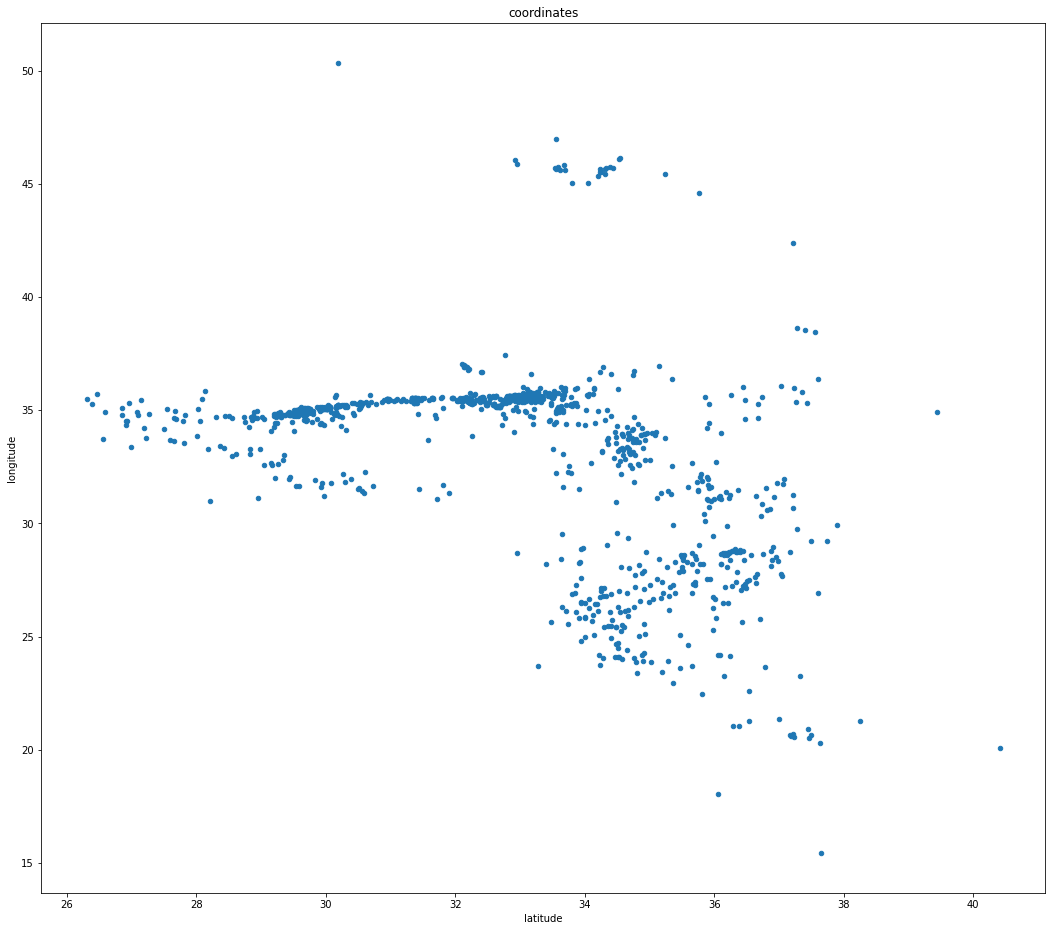

In [6]:
#plotting earthquake's locations
Quakeplt.plot(kind='scatter', x='Lat', y='Long', figsize=(18, 16))
plt.title('coordinates')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [7]:
#list of all region names in a dataframe
Quakeplt['Region'].unique()

array(['E.Mediter.Sea', 'Hula-Kinneret', 'Turkey', 'Roum', nan, 'Arava',
       'Carmel-Tirza', 'Iraq', 'Yamune', 'Galilee', 'Jordan-valley',
       'Egypt', 'Cyprus', 'E.Shomron', 'Judea-Samaria', 'Arif-fault',
       'Dead-Sea-Basin', 'Red-Sea', 'Suez', 'W.sirhan', 'Eilat-Deep',
       'Central-Israel', 'Sinai', 'Aragonese_Deep', 'East-Sinai',
       'Barak-fault', 'Palmira', 'Saudi-Arabia', 'Lebanon', 'W.Sirhan',
       'Syria', 'Negev', 'Sharon', 'Thamad', 'Northen-Jordan',
       'Paran-fault', 'Aragonese-Deep', 'Jordan-Valley', 'Jordan',
       'Arnona-Dakar-Deep', 'arava'], dtype=object)

In [8]:
# earthquakes in 'arava' and 'jordan valley' regions
Quake_aravajordanvalley=Quakeplt.loc[Quakeplt['Region'].isin(['Arava','Jordan-valley'])]

#only earthquakes in a dead sea region
Quake_DS=Quakeplt.loc[Quakeplt['Region']=='Dead-Sea-Basin']
Quake_DS.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
88,2018,2,1,17,20,58.5,NaN,NaN,1.7,2,30.965,35.3953,Dead-Sea-Basin
100,2018,2,5,1,38,37.1,NaN,NaN,1.4,8,31.5136,35.5269,Dead-Sea-Basin
115,2018,2,10,4,19,42.5,2.3,NaN,2.4,21,31.1,35.5186,Dead-Sea-Basin
170,2018,2,26,20,9,24.4,NaN,NaN,1.1,24,31.2394,35.4168,Dead-Sea-Basin
226,2018,3,19,11,36,32.6,NaN,NaN,1.1,17,31.1592,35.4171,Dead-Sea-Basin


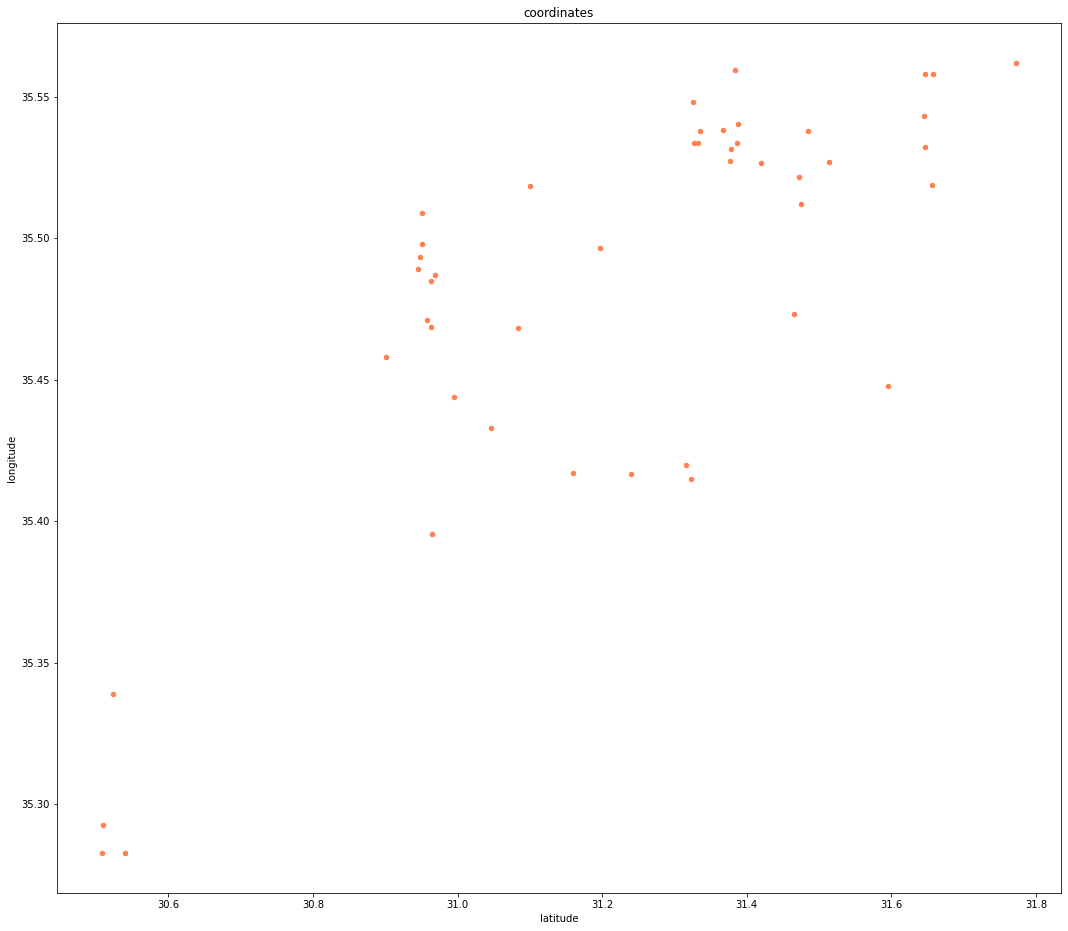

In [9]:
#plotting earthquake's locations of dead sea valley
Quake_DS.plot(kind='scatter', x='Lat', y='Long',figsize=(18, 16),c='coral')
#Quake_aravajordanvalley
plt.title('coordinates')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [10]:
#time column from 'Hour', 'Min', 'Sec' columns
Quakeplt['Time'] = Quakeplt['Hour'].astype(str) + ':' + Quakeplt['Min'].astype(str) + ':' + Quakeplt['Sec'].apply(np.floor).astype(str) #round seconds down

#creating timesatnps out of 'Year', 'Month', 'Day', 'Hour', 'Min', 'Sec' columns
Quakeplt['Datetime'] = pd.to_datetime(Quakeplt[['Day','Month','Year', 'Time']].astype(str).apply(' '.join, 1), format='%d %m %Y %H:%M:%S')
Quakeplt.head()

#to display column names
#Quakeplt.columns

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region,Time,Datetime
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea,12:49:34,2018-01-02 12:49:34
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret,17:10:56,2018-01-02 17:10:56
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea,3:17:18,2018-01-05 03:17:18
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey,4:33:17,2018-01-05 04:33:17
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea,12:58:6,2018-01-05 12:58:06


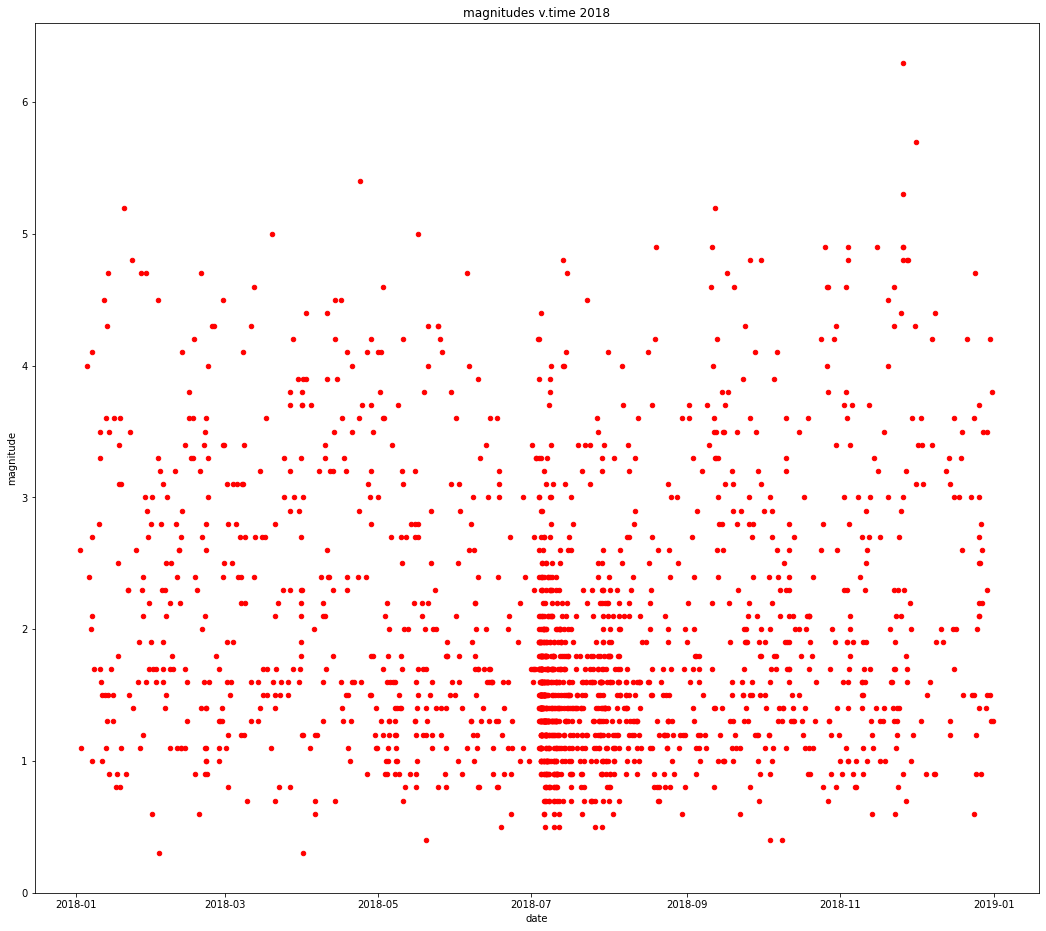

In [11]:
#plotting earthquake's magnitude(Mw) vs time in 2018
Quakeplt.plot(kind='scatter', x='Datetime', y='Mw',figsize=(18, 16),c='red')
plt.title('magnitudes v.time 2018')
plt.xlabel('date')
plt.ylabel('magnitude')

plt.show()

In [14]:
#only earthquakes in a dead sea region
Quake_Ar=Quakeplt.loc[Quakeplt['Region']=='Arava']
Quake_Ar.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region,Time,Datetime
16,2018,1,7,21,37,37.4,1.8,NaN,1.7,11,29.9623,35.0804,Arava,21:37:37,2018-01-07 21:37:37
19,2018,1,10,5,37,52.7,NaN,NaN,1.7,9,30.1907,35.2222,Arava,5:37:52,2018-01-10 05:37:52
23,2018,1,11,6,14,2,NaN,NaN,1.5,16,30.0372,35.1197,Arava,6:14:2,2018-01-11 06:14:02
24,2018,1,11,6,26,48.1,NaN,NaN,1,17,30.0525,35.1301,Arava,6:26:48,2018-01-11 06:26:48
35,2018,1,13,1,58,43.4,NaN,NaN,1.3,17,30.2014,35.2029,Arava,1:58:43,2018-01-13 01:58:43


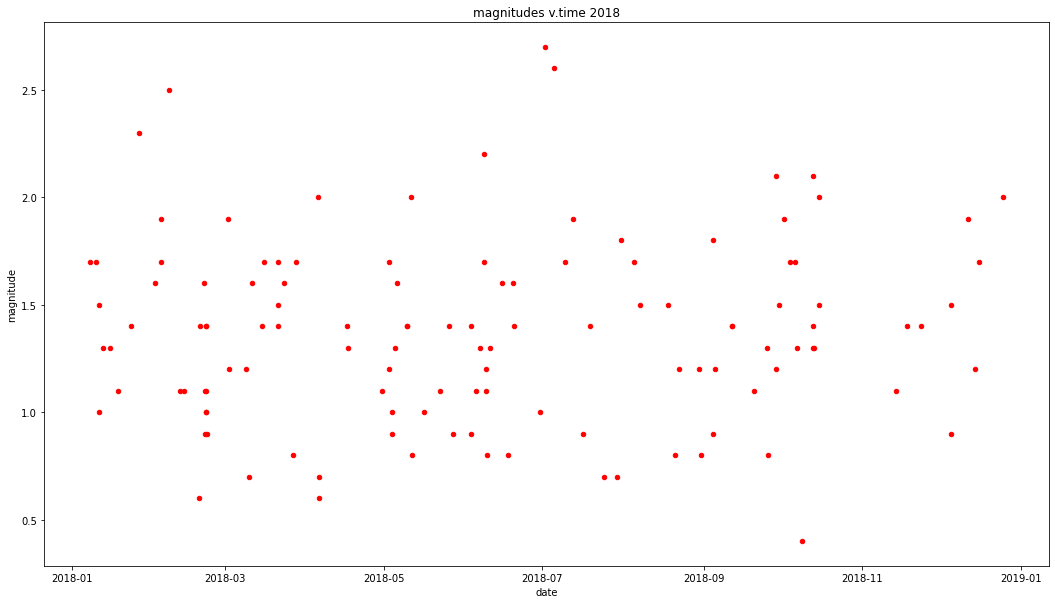

In [15]:
#plotting earthquake's magnitude(Mw) vs time in 2018 of dead sea basin
Quake_Ar.plot(kind='scatter', x='Datetime', y='Mw',figsize=(18, 10),c='red')
plt.title('magnitudes v.time 2018')
plt.xlabel('date')
plt.ylabel('magnitude')

plt.show()

In [17]:
#checking data types in a dataframe
Quake_Ar.dtypes

0
Year                object
Month               object
Day                 object
Hour                object
Min                 object
Sec                 object
Md                  object
Mb                  object
Mw                  object
Depth               object
Lat                 object
Long                object
Region              object
Time                object
Datetime    datetime64[ns]
dtype: object

In [18]:
#creaing a db for neural prophet to use later
npForArava=Quake_Ar[['Datetime', 'Mw']]
npForArava.dropna(inplace=True)
npForArava.columns=['ds', 'y']
npForArava.head()

c:\users\yelsk\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,y
16,2018-01-07 21:37:37,1.7
19,2018-01-10 05:37:52,1.7
23,2018-01-11 06:14:02,1.5
24,2018-01-11 06:26:48,1
35,2018-01-13 01:58:43,1.3
